In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [70]:
df_path = os.path.join(os.getcwd(), 'Datasets', 'Index2018.csv')

In [71]:
raw_df = pd.read_csv(df_path)

In [72]:
df_w = raw_df.copy()

In [73]:
df_w

date          spx       dax         ftse    nikkei
0     07/01/1994   469.900000   2224.95  3445.980000  18124.01
1     10/01/1994   475.270000   2225.00  3440.580000  18443.44
2     11/01/1994   474.130000   2228.10  3413.770000  18485.25
3     12/01/1994   474.170000   2182.06  3372.020000  18793.88
4     13/01/1994   472.470000   2142.37  3360.010000  18577.26
...          ...          ...       ...          ...       ...
6264  23/01/2018  2839.130362  13559.60  7731.827774  24124.15
6265  24/01/2018  2837.544008  13414.74  7643.428966  23940.78
6266  25/01/2018  2839.253031  13298.36  7615.839954  23669.49
6267  26/01/2018  2872.867839  13340.17  7665.541292  23631.88
6268  29/01/2018  2853.528411  13324.48  7671.533300  23629.34

[6269 rows x 5 columns]

In [74]:
df_w.describe()

spx           dax         ftse        nikkei
count  6269.000000   6269.000000  6269.000000   6269.000000
mean   1288.127542   6080.063363  5422.713545  14597.055700
std     487.586473   2754.361032  1145.572428   4043.122953
min     438.920000   1911.700000  2876.600000   7054.980000
25%     990.671905   4069.350000  4486.100000  10709.290000
50%    1233.420000   5773.340000  5662.430000  15028.170000
75%    1459.987747   7443.070000  6304.250000  17860.470000
max    2872.867839  13559.600000  7778.637689  24124.150000

isna() restituisce un df in cui per ogni cella del df su cui viene chiamato viene assegnato un valore boolean (false se il valore non è nullo, true se lo è)

In [75]:
df_w.isna()

date    spx    dax   ftse  nikkei
0     False  False  False  False   False
1     False  False  False  False   False
2     False  False  False  False   False
3     False  False  False  False   False
4     False  False  False  False   False
...     ...    ...    ...    ...     ...
6264  False  False  False  False   False
6265  False  False  False  False   False
6266  False  False  False  False   False
6267  False  False  False  False   False
6268  False  False  False  False   False

[6269 rows x 5 columns]

sum() chiamato sul df restituisce la somma di tutti i valori nulli per colonna ( ossia quelli che sono true e dunque hanno valore 1 )

In [76]:
df_w.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

Se dà problemi per WebGL non supportato, utilizzare l'opzione render_mode con svg

In [77]:
fig = px.line(df_w, x='date', y=['spx', 'dax', 'ftse', 'nikkei'], render_mode='svg', hover_name='date')
fig.show()

Proviamo a trasformare il df da wide a long

In [78]:
df_long = df_w.melt(id_vars="date", var_name="indice", value_name="valore")

Ora il nuovo df ha "riformattato" il vecchio creando una colonna indice in cui vengono inseriti come valori le colonne del df precedente associandovi il rispettivo valore nella relativa colonna. In sintesi, si otterranno 4 record per ogni data, ognuno relativo a un indice specifico

In [79]:
df_long

date  indice    valore
0      07/01/1994     spx    469.90
1      10/01/1994     spx    475.27
2      11/01/1994     spx    474.13
3      12/01/1994     spx    474.17
4      13/01/1994     spx    472.47
...           ...     ...       ...
25071  23/01/2018  nikkei  24124.15
25072  24/01/2018  nikkei  23940.78
25073  25/01/2018  nikkei  23669.49
25074  26/01/2018  nikkei  23631.88
25075  29/01/2018  nikkei  23629.34

[25076 rows x 3 columns]

In questo caso ho la necessità di raggruppare i dati dentro il grafico, specificando per cosa (in questo caso indice)

In [91]:
fig2 = px.line(df_long, x='date', y='valore', line_dash='indice', color='indice', render_mode='svg', hover_name='indice', title='Bank Indexes', subtitle='Daily', width=900, height=600)
fig2.show()

In [87]:
fig2 = px.line(df_long, x='date', y='valore', line_dash='indice', color='indice', render_mode='svg', hover_name='indice', facet_col='indice', facet_col_wrap=2)
fig2.show()

QQ Plot

In [92]:
import scipy.stats as stats
import pylab as pl

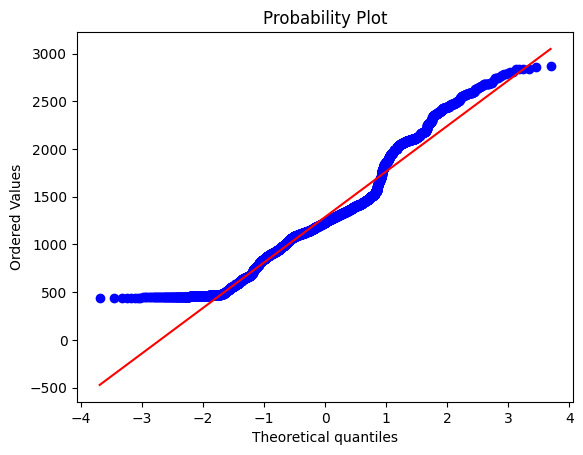

In [93]:
stats.probplot(df_w.spx, plot = pl)
pl.show()

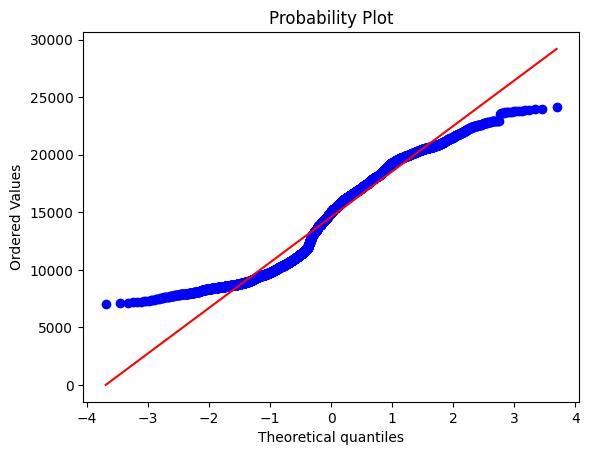

In [94]:
stats.probplot(df_w.nikkei, plot = pl)
pl.show()

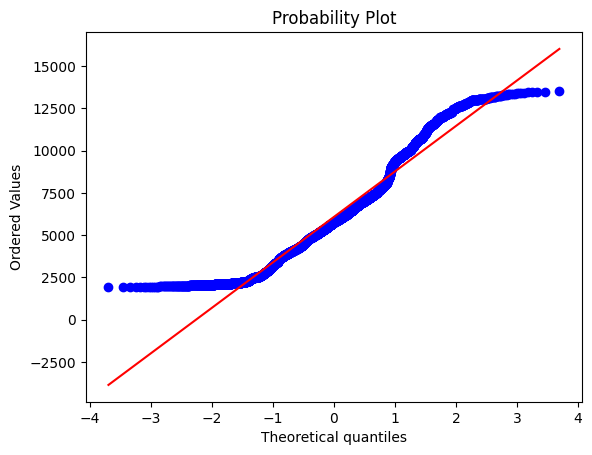

In [95]:
stats.probplot(df_w.dax, plot = pl)
pl.show()

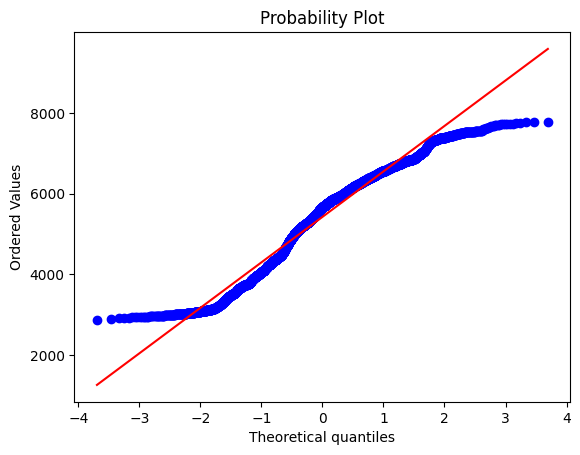

In [96]:
stats.probplot(df_w.ftse, plot = pl)
pl.show()

Nessuno degli indici segue una distribuzione normale